# This project will be dedicated to the analysis of mental health as it relates to unemployment and race/ethnicity in the US.

The goal of this model is to predict how much mental health will be impacted in the case of an extreme economic/health crisis, such as the COVID-19 pandemic.  Because of systemic racism, often non-white (white being the majority in the population as of 2024) races in the USA will be prevented from access to resources, one of those being mental health resources.  Mental health is a vital to existence, and is an avenue of life that should not be ignored or mistreated.  Having poor mental health is commonly associated with many travesties: such as suicude, drug addiction, bullying, homicide, and many more.  Thus it is important that every human being has education and access to tools that can help remedy down swings in mental health.

Important resources for mental health can be very basic: do you have enough food, nutrients, water, sleep, clean air, clean water, etc.  Other mental health resources can take place as talk therapy, exercise, or medication guided by psychiatry.  All of these things that are remedies for poor mental health require money or time, and if you do not have either or those and are facing severe stress or a crisis, there is a high chance your mental health is at risk.

It is not only the government's responsibility but also the private industries that are dependent on current labor and the labor of tomorrow, to ensure that the people are nurtured.  The people pay their sweat and tears to these institutions either in man hours or taxes or both, and they deserve to have a balanced transaction, where their health can be accomodated for, which includes mental health.  

Therefore, this data wrangling will hope to uncover some useful information that will see how economic crises impact different racial/ethnic groups differently in times of crisis.  This kind of information will be useful in resource distribution from institutions (i.e. preparing food/water delivery routes to large at risk communities; preparing talk sessions/literature to be parsed out in times of need; preparing emotional intelligence counseling for interpersonal violence, social or physical; preparing narcan, methadone, nicotine patches, or other forms of care for addictions services; etc.).




Inputs: unemployment rates, racial/ethnic identity, time 

Outputs: mental health scores


# In this notebook I will:

1.) Open and examine the mental health surveys

2.) Open and examine the unemployment information from three separate files (these are merged into one)

3.) Merge all relevant data together

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.) Open Mental Health Survey Data

In [2]:
mh = pd.read_csv('Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')

In [3]:
mh.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


In [4]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11484 entries, 0 to 11483
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               11484 non-null  object 
 1   Group                   11484 non-null  object 
 2   State                   11484 non-null  object 
 3   Subgroup                11484 non-null  object 
 4   Phase                   11484 non-null  object 
 5   Time Period             11484 non-null  int64  
 6   Time Period Label       11484 non-null  object 
 7   Time Period Start Date  11484 non-null  object 
 8   Time Period End Date    11484 non-null  object 
 9   Value                   10944 non-null  float64
 10  Low CI                  10944 non-null  float64
 11  High CI                 10944 non-null  float64
 12  Confidence Interval     10944 non-null  object 
 13  Quartile Range          7650 non-null   object 
dtypes: float64(3), int64(1), object(10)
me

In [5]:
mh['Group'].unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [6]:
mh[mh['Group']=='By Race/Hispanic ethnicity'].count()

Indicator                 870
Group                     870
State                     870
Subgroup                  870
Phase                     870
Time Period               870
Time Period Label         870
Time Period Start Date    870
Time Period End Date      870
Value                     750
Low CI                    750
High CI                   750
Confidence Interval       750
Quartile Range              0
dtype: int64

There are 870 relevant data points from this mental health scores

In [7]:
re_sub = mh[mh['Group']=='By Race/Hispanic ethnicity']

In [22]:
re_sub.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Start,End,Value,Low CI,High CI,Confidence Interval,Quartile Range
10,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,29.4,26.8,32.1,26.8 - 32.1,NaN
11,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic White, single race",1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,21.4,20.6,22.1,20.6 - 22.1,NaN
12,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Black, single race",1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,25.6,23.7,27.5,23.7 - 27.5,NaN
13,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic Asian, single race",1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,23.6,20.3,27.1,20.3 - 27.1,NaN
14,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,"Non-Hispanic, other races and multiple races",1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,28.3,24.8,32.0,24.8 - 32.0,NaN


In [8]:
re_sub['Subgroup'].unique()

array(['Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races'], dtype=object)

In [9]:
re_sub['Indicator'].unique()

array(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder',
       'Symptoms of Anxiety Disorder or Depressive Disorder'],
      dtype=object)

In [10]:
re_sub = re_sub.rename(columns={'Time Period Start Date':'Start','Time Period End Date':'End'})

In [11]:
re_sub = re_sub.astype({'Start':'datetime64[ns]','End':'datetime64[ns]'})

In [12]:
re_sub.dtypes

Indicator                      object
Group                          object
State                          object
Subgroup                       object
Phase                          object
Time Period                     int64
Time Period Label              object
Start                  datetime64[ns]
End                    datetime64[ns]
Value                         float64
Low CI                        float64
High CI                       float64
Confidence Interval            object
Quartile Range                 object
dtype: object

In [13]:
re_sub['Value'].describe()

count    750.000000
mean      31.504000
std        7.666811
min       14.000000
25%       26.100000
50%       31.200000
75%       36.500000
max       52.600000
Name: Value, dtype: float64

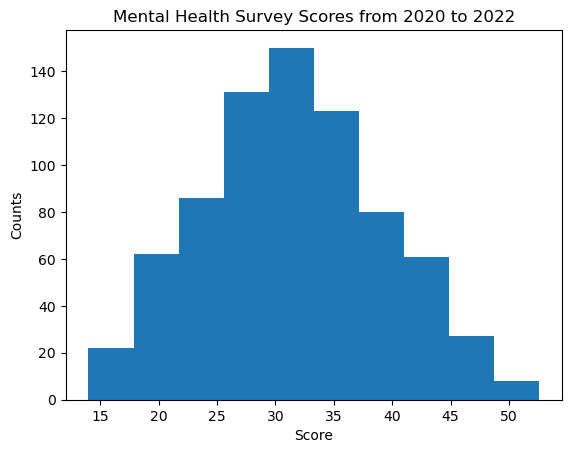

In [14]:
fig, ax = plt.subplots()

ax.hist(re_sub['Value'], bins=10)
ax.set_xlabel('Score')
ax.set_ylabel('Counts')
ax.set_title('Mental Health Survey Scores from 2020 to 2022')
plt.show()

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4927366/#:~:text=The%20PHQ%2DADS%20is%20the,of%20depression%20and%20anxiety%20symptomatology.

## Based on the article above, the max score should only be 48 at most for anxiety (GAD7) and depression (PHQ-9) tests combined

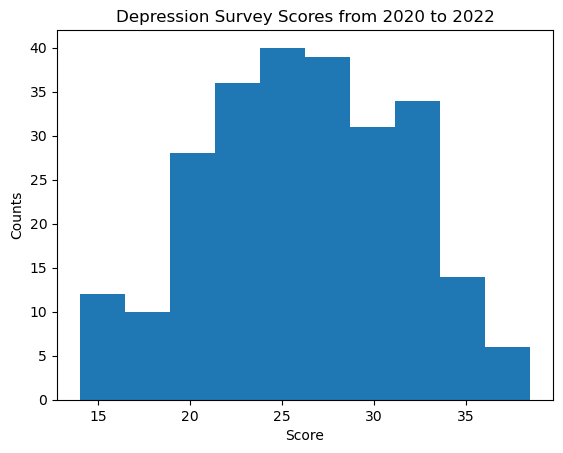

In [15]:
dep = re_sub.loc[re_sub['Indicator']== 'Symptoms of Depressive Disorder','Value']
fig, ax = plt.subplots()

ax.hist(dep, bins=10)
ax.set_xlabel('Score')
ax.set_ylabel('Counts')
ax.set_title('Depression Survey Scores from 2020 to 2022')
plt.show()

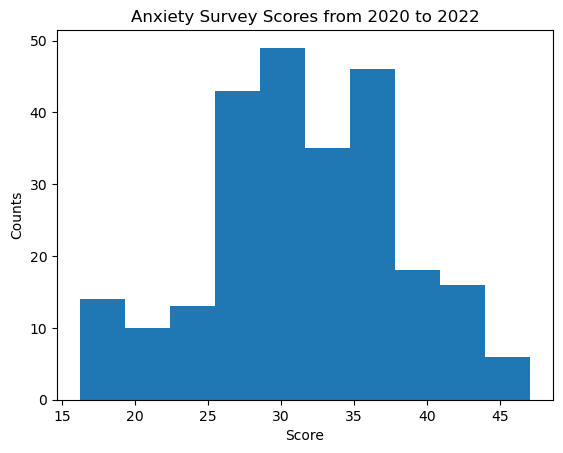

In [16]:
anx = re_sub.loc[re_sub['Indicator']== 'Symptoms of Anxiety Disorder','Value']
fig, ax = plt.subplots()

ax.hist(anx, bins=10)
ax.set_xlabel('Score')
ax.set_ylabel('Counts')
ax.set_title('Anxiety Survey Scores from 2020 to 2022')
plt.show()

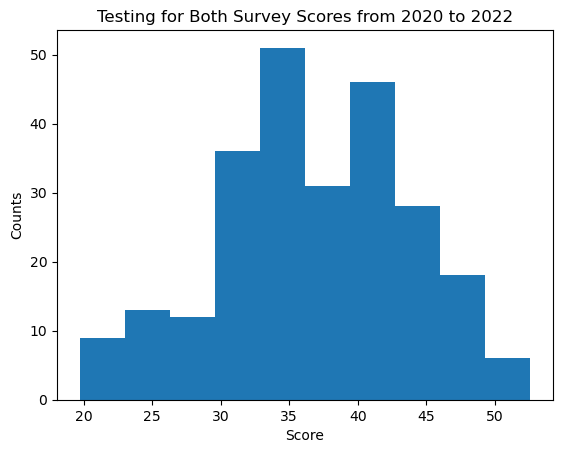

In [17]:
both = re_sub.loc[re_sub['Indicator']== 'Symptoms of Anxiety Disorder or Depressive Disorder','Value']
fig, ax = plt.subplots()

ax.hist(both, bins=10)
ax.set_xlabel('Score')
ax.set_ylabel('Counts')
ax.set_title('Testing for Both Survey Scores from 2020 to 2022')
plt.show()

## The kaggle dataset says that the tests are coming from the GAD-2 and PHQ-2 but the tests are saying otherwise.  For the purposes of this dataframe, a higher score is indicative of a greater disease state

# 2.) Open the Unemployment Data

## The data is coming in from a very chunky format, so will be condensed in excel

In [49]:
unemp = pd.read_csv('Summary_Sheet - Sheet1.csv')

In [50]:
unemp.head()

,Description,Statistic
0,"White, M, 2019, Unemployed",2266.0
1,"White, M, 2019, Unemployment Rate",3.3
2,"White, M, 2020, Unemployed",4725.0
3,"White, M, 2020, Unemployment Rate",7.0
4,"White, M, 2021, Unemployed",3222.0


In [52]:
markers = []
for x in range(len(unemp)):
    if 'Unemployed' in unemp['Description'][x]:
        markers.append(x)

In [53]:
unemp_only = unemp.loc[markers] * 1000

In [54]:
unemp_only = unemp_only.reset_index(drop=True)

In [55]:
rate_only = unemp.loc[[x for x in range(0,64) if x not in markers]]

In [56]:
rate_only = rate_only.reset_index(drop=True)

Lets capture the change in unemployment and unemployment rate and assign it to a year (2020-2019 will assign to 2020... to reflect the change in economic behavior from year to year and the consequent change in mental health scores on the survey)

In [120]:
demos = ['W','B','A','H']
gender = ['M', 'F']
years = [2020, 2021, 2022]
year_list = []
demo_list = []
gender_list = []

In [121]:
for x in range(0,8):
    for y in years:
        year_list.append(y)

In [124]:
i = 0
j= 0 
while i < 4:
    i += 1
    for x in gender:
        gender_list.append(x)
        gender_list.append(x)
        gender_list.append(x)

In [127]:
for x in demos:
    i = 0
    while i < 6:
        i +=1
        demo_list.append(x)

In [129]:
def diff_calc(df, col):
    diff_list = []
    index = 0
    count = 0
    for x in df[col]:
        count += 1
        if count == 4 and index == 0:
            
            diff_1 = df[col][1]- df[col][0]
            diff_2 = df[col][2]- df[col][1]
            diff_3 = df[col][3]- df[col][2]
            
            index += 1
            
            diff_list.append(diff_1)
            diff_list.append(diff_2)
            diff_list.append(diff_3)
            
            count = 0
            
        elif count == 4 and index !=0:
 
            add_on = index * 4
            diff_1 = df[col][1+ add_on]- df[col][0+ add_on]
            diff_2 = df[col][2+ add_on]- df[col][1+ add_on]
            diff_3 = df[col][3+ add_on]- df[col][2 + add_on]
            
            index += 1
            
            diff_list.append(diff_1)
            diff_list.append(diff_2)
            diff_list.append(diff_3)
            
            count = 0
            
            
    return diff_list
            

In [130]:
unemp_diff = diff_calc(unemp_only, 'Statistic')

In [133]:
rate_diff = diff_calc(rate_only, 'Statistic')

In [139]:
unemp_v2 = pd.DataFrame({'Year':year_list,'Race':demo_list, 'Gender': gender_list, 'unemployment_rate_change':rate_diff, 'unemployment_change':unemp_diff})

In [231]:
unemp_v2.head()

,Year,Race,Gender,unemployment_rate_change,unemployment_change
0,2020,W,M,3.7,2459000.0
1,2021,W,M,-2.2,-1503000.0
2,2022,W,M,-1.5,-984000.0
3,2020,W,F,4.4,2472000.0
4,2021,W,F,-3.0,-1733000.0


because we are not doing a gender lens, we should perform a weighed average of the unemployment rate for the genders within each race

this equation would look like:
|unemployment rate * unemployed| + |unemployment rate * unemployed|/ total unemployed

In [147]:
def weighted_avg(r1, r2, u3, u4):
    return ((r1*u3)+(r2*u4))/(u3+u4)
    

In [172]:
def weighing(df):
    weighted_list = []
    y_index = 0
    g_index = 0
    
    i = 0
    while i < 12:
        i += 1
        r1 = df.iloc[g_index,3]
        r2 = df.iloc[g_index+3, 3]
        u3 = df.iloc[g_index, 4]
        u4 = df.iloc[g_index+3, 4]
        
        weighted_list.append(weighted_avg(r1, r2, u3, u4))
        
        g_index += 1
        y_index += 1
        
        if y_index == 3:
            g_index += 3
            y_index = 0
            
    return weighted_list


In [176]:
weighted = weighing(unemp_v2)

In [196]:
def summed(df):
    summed_list = []
    y_index = 0
    g_index = 0
    
    i = 0
    while i < 12:
        i += 1
        u3 = df.iloc[g_index, 4]
        u4 = df.iloc[g_index+3, 4]
        sum_ = u3 + u4
        
        summed_list.append(sum_)
        
        g_index += 1
        y_index += 1
        
        if y_index == 3:
            g_index += 3
            y_index = 0
            
    return summed_list

In [197]:
summed = summed(unemp_v2)

In [178]:
demos = ['W','B','A','H']
years = [2020, 2021, 2022]

In [179]:
year_list_2 = []
demo_list_2 = []

In [180]:
for x in range(0,4):
    for y in years:
        year_list_2.append(y)

In [181]:
for x in demos:
    i = 0
    while i < 3:
        i +=1
        demo_list_2.append(x)

In [200]:
unemp_v3 = pd.DataFrame(data={'Year':year_list_2, 'Race':demo_list_2, 'weighted_unemployment_rate_change':weighted, 'total_unemployed_change':summed})

In [201]:
unemp_v3.head(12)

,Year,Race,weighted_unemployment_rate_change,total_unemployed_change
0,2020,W,4.050923,4931000.0
1,2021,W,-2.628430,-3236000.0
2,2022,W,-1.500000,-1805000.0
3,2020,B,5.395916,1053000.0
4,2021,B,-2.900000,-548000.0
5,2022,B,-2.508096,-457000.0
6,2020,A,6.083687,613000.0
7,2021,A,-3.833699,-365000.0
8,2022,A,-2.203571,-224000.0
9,2020,H,6.168662,1771000.0


In [202]:
unemp_v3.loc[unemp_v3['Race']=='W','Race'] = 'Non-Hispanic White, single race'

In [203]:
unemp_v3.loc[unemp_v3['Race']=='B','Race'] = 'Non-Hispanic Black, single race'

In [204]:
unemp_v3.loc[unemp_v3['Race']=='A','Race'] = 'Non-Hispanic Asian, single race'

In [205]:
unemp_v3.loc[unemp_v3['Race']=='H','Race'] = 'Hispanic or Latino'

In [206]:
unemp_v3.head(12)

,Year,Race,weighted_unemployment_rate_change,total_unemployed_change
0,2020,"Non-Hispanic White, single race",4.050923,4931000.0
1,2021,"Non-Hispanic White, single race",-2.628430,-3236000.0
2,2022,"Non-Hispanic White, single race",-1.500000,-1805000.0
3,2020,"Non-Hispanic Black, single race",5.395916,1053000.0
4,2021,"Non-Hispanic Black, single race",-2.900000,-548000.0
5,2022,"Non-Hispanic Black, single race",-2.508096,-457000.0
6,2020,"Non-Hispanic Asian, single race",6.083687,613000.0
7,2021,"Non-Hispanic Asian, single race",-3.833699,-365000.0
8,2022,"Non-Hispanic Asian, single race",-2.203571,-224000.0
9,2020,Hispanic or Latino,6.168662,1771000.0


# 3.) Merge the unemployment information onto the mental health score information


In [224]:
re_sub['Year'] = re_sub['Start'].dt.year

In [228]:
merge = pd.merge(re_sub, unemp_v3, left_on=['Year','Subgroup'], right_on=['Year','Race'])

In [229]:
merge.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Start,End,Value,Low CI,High CI,Confidence Interval,Quartile Range,Year,Race,weighted_unemployment_rate_change,total_unemployed_change
0,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,29.4,26.8,32.1,26.8 - 32.1,NaN,2020,Hispanic or Latino,6.168662,1771000.0
1,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,36.3,33.4,39.2,33.4 - 39.2,NaN,2020,Hispanic or Latino,6.168662,1771000.0
2,Symptoms of Anxiety Disorder or Depressive Dis...,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,1,"Apr 23 - May 5, 2020",2020-04-23,2020-05-05,42.7,39.7,45.7,39.7 - 45.7,NaN,2020,Hispanic or Latino,6.168662,1771000.0
3,Symptoms of Depressive Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,2,"May 7 - May 12, 2020",2020-05-07,2020-05-12,27.9,24.4,31.6,24.4 - 31.6,NaN,2020,Hispanic or Latino,6.168662,1771000.0
4,Symptoms of Anxiety Disorder,By Race/Hispanic ethnicity,United States,Hispanic or Latino,1,2,"May 7 - May 12, 2020",2020-05-07,2020-05-12,36.2,32.6,39.9,32.6 - 39.9,NaN,2020,Hispanic or Latino,6.168662,1771000.0


In [230]:
merge.to_csv('wrangled_data_v1.csv')

## Summary: There is a lot of important information included in the two data sources; the mental health survey information contains information on race/ethnicity and mental health survey scores over three years, while the BLS summary contains the unemployment rate changes and unemployment amount changes in the same three years.  Together, this makes a dataframe with valuable information on economic and mentalh health related information